# Lambda Function

Construct and plot the lambda function, defined as:
$$
\Lambda(q,x) := \sum_{i=0}^{n} |l_i(x)| 
$$

In [1]:
# This is used for plots and numpy
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
def lagrange_basis(xi, i):
    def func(x):
        assert i<len(xi) and i>=0, 'Out of range: 0 t< i < len(xi)'
        p = 1
        for j,xj in enumerate(xi): #xi[range(i)+range(i+1,len(xi))]: this was not working!
            if (j!=i):
                p *= (x-xj)/(xi[i]-xj)
        return p
    return func

Test your implementation, plotting $l_i(x)$ for five equally spaced points.

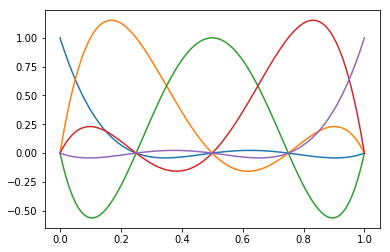

In [3]:
x = linspace(0,1,5)
xi = linspace(0,1,100)

for i,_ in enumerate(x):
    a = lagrange_basis(x,i)
    _ = plot(xi,a(xi))

In [4]:
import math

def lambda_function(xi):
    def lamb(x):
        l = 0
        for i,_ in enumerate(xi):
            y = numpy.linalg.norm(lagrange_basis(xi, i)(x))
            l += y
        return l
    return lamb


In [5]:
from numpy.testing import *

assert_equal(lambda_function(linspace(0,1,3))(.25),1.25)
assert_almost_equal(lambda_function(linspace(0,1,5))(.3),1.2464,decimal=8)

Plot $\Lambda(q)(x)$ for equispaced nodes on the interval $[0,1]$ for 3, 5, and 7 equispaced nodes respectively. Comment the result.

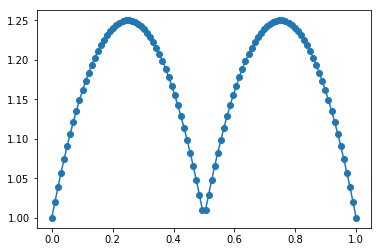

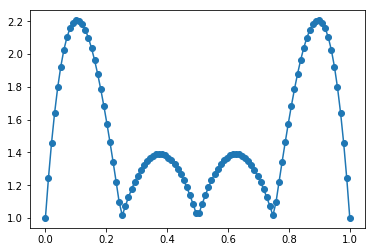

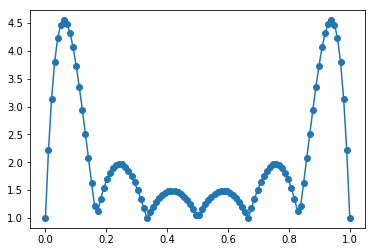

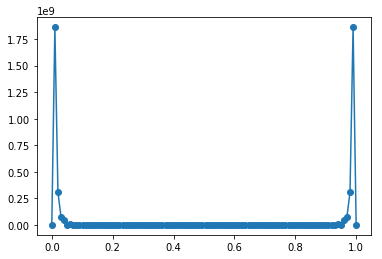

In [6]:
xi = linspace(0,1,100)

n = 3, 5, 7, 40

for i in n:
    a = lambda_function(linspace(0,1,i))
    l = []
    for i,j in enumerate(xi):
        l.append(a(j))
    
    _= plot(xi,l, '-o')
    plt.show()

YOUR ANSWER HERE:
In those graphs we can clearly see the problem of oscillation at the edges of the given interval, that occurs when using polynomial interpolation on a set of equispaced points.
This problem get worst and worst increaasing the number of interpolating points used (I draw also the graph with n = 40 points to emphasize the phenomenon).
We can have a numerical measure of how bas is the interpolation computing the Lebesgue constant for n equispaced points, which value is lesser or equal then 2^n/(e*n*log(n)).
We notice, infact, that the Lebesgue constant increases with increasing n, diverging to inf while n->inf.


## Chebyshev Nodes

Chebyshev nodes are defined as:
$$
x_k = cos\left(\frac{2k-1}{2n} \pi \right), k = 1,\ldots,n.
$$
Write a function to evaluate then for a given $n$.


In [6]:
from math import cos, pi

def chebyshev_nodes(n):
    x = []
    for k in range(1,n+1):
        x.append(cos((2*k-1)*pi/(2*n)))
    return x

In [7]:
assert_almost_equal(chebyshev_nodes(5),[  9.51056516e-01, 5.87785252e-01,   6.12323400e-17,  -5.87785252e-01,
  -9.51056516e-01],decimal=8)
assert_almost_equal(chebyshev_nodes(7),[  9.74927912e-01,   7.81831482e-01,   4.33883739e-01,   6.12323400e-17,
  -4.33883739e-01,  -7.81831482e-01,  -9.74927912e-01],decimal=8)

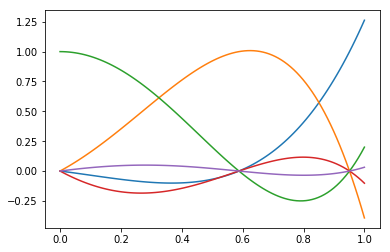

In [8]:
#just to try
x = linspace(0,1,5)
xi = linspace(0,1,100)

for i,_ in enumerate(x):
    a = lagrange_basis(x,i)
    _ = plot(xi,a(xi))

Plot the location of chebyshev nodes on the unit circle, and on the orizontal axis.

 - plot the positive sector of a cirumference with center $0$ and radius $1$.
 - plot the location of chebicev points on the cirumference, suggested plot option is `'*'`.
 - plot projection lines from the circle center to chebyshev nodes projected on the circumference.
 - plot projection lines from chebyshev nodes projected on the circumference to chebyshev nodes on the horizontal axis.
 - plot chebyshev nodes, suggested plot option is `'o'`.
 - make sure the axis are such that the resulting plot is truly a circle...

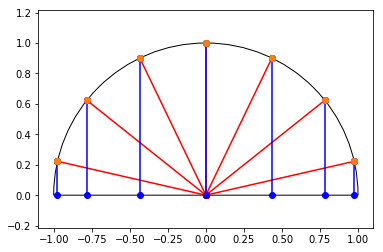

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
from math import sqrt

# 1) 
fig, ax = plt.subplots()

c = (0, 0)
r = 1
w = Wedge(c, r, theta1 = 0, theta2 = 180, fill=False)
ax.add_patch(w)

# 2)
cheb = chebyshev_nodes(7)
def f(x): 
    cheb_y = []
    for i, xi in enumerate(x):
        cheb_y.append(sqrt(1-xi**2)) 
    return cheb_y

cheb_y = f(cheb)
ax.plot(cheb, cheb_y, '*')

# 3)
for i in range(len(cheb)):
    plt.plot([0,cheb[i]],[0, cheb_y[i]], 'ro-')
    
# 4)
for i in range(len(cheb)):
    plt.plot([cheb[i], cheb[i]], [0, cheb_y[i]], 'bo-')

# 5)
plt.plot(cheb, cheb_y, 'o')


ax.axis('equal')
plt.show()

Plot $\Lambda(q)(x)$ for chebyshev nodes on the interval $[x_0,x_n]$ for 3, 5, and 7 nodes respectively. Comment the result.

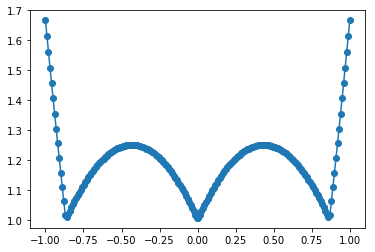

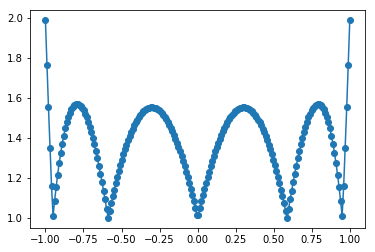

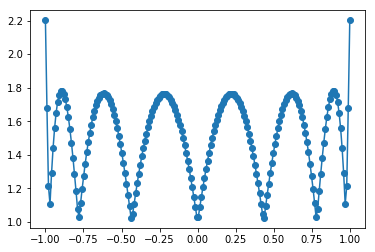

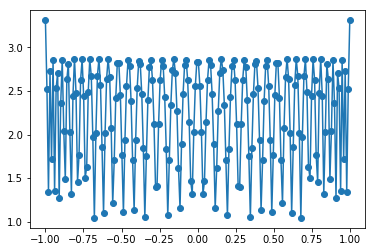

In [10]:
xi = linspace(-1,1,200)
n = 3, 5, 7, 40

for i in n:
    a = lambda_function(chebyshev_nodes(i))
    l = []
    for i,j in enumerate(xi):
        l.append(a(j))
    
    _= plot(xi,l, '-o')
    plt.show()

YOUR ANSWER HERE:
Here we are computing the lebesgue function using not more equispaced points but chebyshev nodes (notice that also the interval changed: here we are using [-1, 1] while before we used [0, 1]).
The biggest difference in using Chebyshev points is that here we have a bigger density of interpolating points on the edge of the interval. Using those points we are minimizing the value of the Lebesgue constant, which in this case has to be lesser or equal then (2/pi)log(n+1) + 1. In this way we are able to reach a better interpolation of that obteined with equispaced points.
However, we have to notice that as n->inf the Lebesgue constant is still diverging.

Define a function `function_norm` that returns $||f(x)||\infty$ with $x\in[a,b]$ (default to $[0,1]$). To keep the implementation simple, evaluate the given function over $2^n+1$ points and return the maximum value. Any smarter and correct implementation is welcome. $n$ should be selectable at run time, and it should be by default equal to 20 (rhoughly a million points)

In [32]:
from math import pi, log10

def function_norm(func, a=0, b=1, n=20, cheb = False):
    if (a>b):
        tmp = a
        a = b
        b = tmp
    delta = (b-a)/(2**n)
    m = -1
    for i in range(0,(2**(n))+1):
        new_max = max(m, abs(func(a + i*delta)))
        if (cheb == True):
            if (new_max <= ((2/pi)*log10(n+1) + 1) ):  
                m = new_max   
        else:
            m = new_max
    #print(m)
    return m

In [62]:
assert_almost_equal(function_norm(lambda_function(linspace(0,1,7)),0,1,10),4.54922445348, decimal=5)
assert_almost_equal(function_norm(lambda_function(linspace(0,1,5)),0,1,10),2.20780651848, decimal=5)

xi = chebyshev_nodes(7)
assert_almost_equal(function_norm(lambda_function(xi),xi[0],xi[-1], cheb = True),1.78252988655, decimal=5)
xi = chebyshev_nodes(5)
assert_almost_equal(function_norm(lambda_function(xi),xi[0],xi[-1], cheb = True),1.57016748842, decimal=5)

4.54922445348
2.20780651848
1.78252988655
1.57016748841


Evaluate the $||\Lambda(q)||_{\infty}$ for degree from 1 to 7, for equispaced points, and for chebyshev nodes. Store the corresponding values in two different arrays `norm_l_eq`, and `norm_l_ch`.

In [12]:
norm_l_eq = []
norm_l_ch = []

for i in range(1,8):
    xi = chebyshev_nodes(i)
    norm_l_eq.append(function_norm(lambda_function(linspace(0,1,i))))
    norm_l_ch.append(function_norm(lambda_function(xi),xi[0],xi[-1], cheb = True))


In [13]:
assert_almost_equal(norm_l_eq,[1.,1.,1.25,1.63113031,2.2078244,3.10630116,4.54934179], decimal=5)#
assert_almost_equal(norm_l_ch,[1.,1.,1.25,1.42987272,1.57016749,1.68514046,1.78252989], decimal=5)

Plot the $||\Lambda(q,x)||_{\infty}$ for degree from 1 to 7, for equispaced points, and for chebyshev nodes.

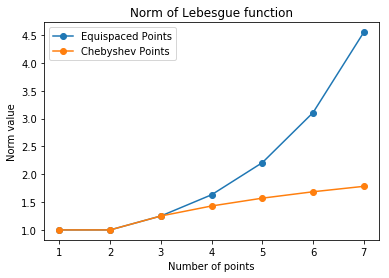

In [14]:
n = [i for i in range(1,8)]

fig, ax = plt.subplots()
ax.plot(n, norm_l_eq, '-o' , label = 'Equispaced Points')
ax.plot(n, norm_l_ch, '-o' , label = 'Chebyshev Points')
ax.set_title('Norm of Lebesgue function')
ax.set_xlabel('Number of points')
ax.set_ylabel('Norm value')

_ = plt.legend()

# Bernstein Basis
Write a function that returns the ith Bernstein Basis of order $n$, using the standard definition: 
$$
B_{i,n}(t) = \binom{n}{i} t^i(1-t)^{n-i}
$$

In [14]:
from scipy import special
def bernstein_polynomial(n,i):
    def b(t):
        bb = special.binom(n,i)*(t**(i))*(1-t)**(n-i)
        return bb
    return b

In [15]:
expected = [[0.48999999999999994, 0.42, 0.09], [0.3429999999999999, 0.4409999999999999, 0.189, 0.026999999999999996], [0.24009999999999995, 0.4115999999999999, 0.2646, 0.07559999999999999, 0.0081], [0.16806999999999994, 0.3601499999999999, 0.3086999999999999, 0.13229999999999997, 0.028349999999999993, 0.0024299999999999994]]

for n in range(2,3):
    for i in range(0,n+1):
        b = bernstein_polynomial(n,i)
        assert_almost_equal(b(.3),expected[n-2][i],decimal=8)

Implement the recursive definition of the bernstein polynomial:
$$
B_{k,n}(t) = (1-t)\cdot B_{k,n-1}(t)+t\cdot B_{k-1,n-1}(t)
$$

 - if $k < 0\ \mathrm{or}\ i > n$ then $B_{k,n} = 0$. 
 - if $k = 0\ \mathrm{and}\ n =0$ then $B_{k,n} = 1$. 

In [47]:
def bernstein_recursive(n,i):
    def b(t):
        if (n<0  or i<0 or i>n):
            return 0
        elif (n == 0 and i == 0):
            return 1
        else:
            res = (1-t)*bernstein_recursive(n-1,i)(t) + t*bernstein_recursive(n-1,i-1)(t)
            return res
    return b

In [49]:
expected = [[0.48999999999999994, 0.42, 0.09], [0.3429999999999999, 0.4409999999999999, 0.189, 0.026999999999999996], [0.24009999999999995, 0.4115999999999999, 0.2646, 0.07559999999999999, 0.0081], [0.16806999999999994, 0.3601499999999999, 0.3086999999999999, 0.13229999999999997, 0.028349999999999993, 0.0024299999999999994]]

for n in range(2,3):
    for i in range(0,n+1):
        b = bernstein_recursive(n,i)
        assert_almost_equal(b(.3),expected[n-2][i],decimal=8)

Implement power basis formula:
$$
B_{k,n}(t) = \sum_{i=k}^n(-1)^{i-k}\binom{n}{i}\binom{i}{k}t^i
$$

In [50]:
from scipy import special

def bernstein_power_basis(n,j):
    def b(t):
        bb = 0
        for i in range(j,n+1):
            bb += (-1)**(i-j) * special.binom(n,i) * special.binom(i,j)  * (t**(i))
        return bb
    return b


In [51]:
expected = [[0.48999999999999994, 0.42, 0.09], [0.3429999999999999, 0.4409999999999999, 0.189, 0.026999999999999996], [0.24009999999999995, 0.4115999999999999, 0.2646, 0.07559999999999999, 0.0081], [0.16806999999999994, 0.3601499999999999, 0.3086999999999999, 0.13229999999999997, 0.028349999999999993, 0.0024299999999999994]]
for n in range(2,3):
    for i in range(0,n+1):
        b = bernstein_power_basis(n,i)
        assert_almost_equal(b(.3),expected[n-2][i],decimal=8)

Plot all basis obtained through the "definition" implementation and through the "power basis" implementation for n=20,40,80,100. Give an explanation for what you observe.

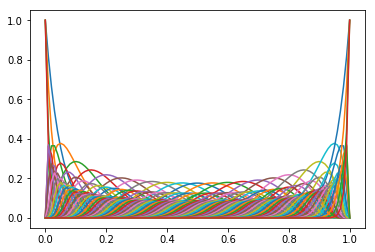

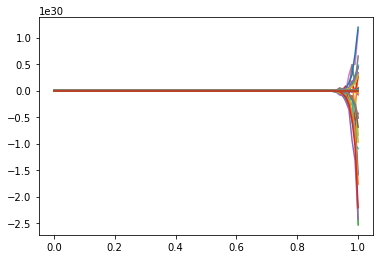

In [52]:
x = linspace(0,1,100)

fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()

ntot = [20,40,80,100]
for n in ntot:
    for i in range(0,n+1):
        b = bernstein_polynomial(n,i)
        ax.plot(x,b(x))
        bb = bernstein_power_basis(n,i)
        ax2.plot(x,bb(x))

YOUR ANSWER HERE

Given the basis functions above, construct the Bernstein approximation of a continuous function, defined as:
$$
B_n(f)(t) := \sum_{i=0}^{n} B_{i,n} (t) * f(i/n) 
$$

In [53]:
def bernstein_interpolation(n, func):
    def f(t):
        a = 0
        for i in range(n+1):
            a += bernstein_power_basis(n,i)(t) * func(i/n)
        return a
    return f

In [54]:
func = lambda t : sin(2*pi*t)
bi = bernstein_interpolation(3,func)
expected = [  0.00000000e+00,1.92450090e-01,-1.92450090e-01,-2.44929360e-16]
assert_almost_equal(bi(linspace(0,1,4)),expected,decimal=8)
bi = bernstein_interpolation(15,func)
expected = [  0.00000000e+00,6.50601790e-01,-6.50601790e-01,-2.44929360e-16]
assert_almost_equal(bi(linspace(0,1,4)),expected,decimal=8)

Test your implementation, plotting the bernstein interpolation of $\sin(2\pi x)$ for different degrees:

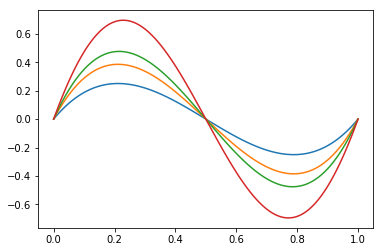

In [55]:
from math import sin, pi

x = linspace(0,1,100)

funct = lambda t: sin(2*pi*t)

ntot = [3,4,5,10]
for n in ntot:
    b = bernstein_interpolation(n,funct)
    _ = plot(x, b(x))

Given tolerance `tol` for the the function `func`, find the order $n$ that satisfies $\mathtt{tol}<||f(x)||_\infty$. Use the `function_norm` previously implemented.

In [37]:
def find_order_given_tolerance(func, tol):
    n = 8
    v = function_norm(func, n)
    print('v=', v)
    while (tol < v):
        n += 1
        v = function_norm(func, n)
        print('v=', v)
    return n
"""
def find_order_given_tolerance(func, tol):
    for n in range(77,79):
        print('n=', n)
        print('v=','%.15f' % function_norm(func, 0.1, 0.9, n))
    return n
"""

"\ndef find_order_given_tolerance(func, tol):\n    for n in range(77,79):\n        print('n=', n)\n        print('v=','%.15f' % function_norm(func, 0.1, 0.9, n))\n    return n\n"

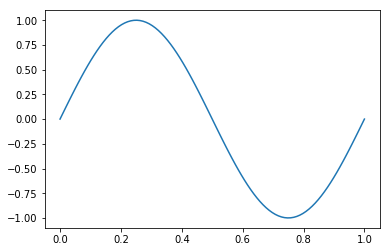

In [28]:
xi = linspace(0,1,100)

h = lambda t : sin(2*pi*t)
_ = plot(xi,h(xi))

In [38]:
func = lambda t : sin(2*pi*t)
assert_equal(find_order_given_tolerance(func,.05),77)
"""
h = lambda x: abs(x-.5)
assert_equal(find_order_given_tolerance(h,.05),64)

g = lambda x: 1/(1+(10*x-5)**2)
assert_equal(find_order_given_tolerance(g,.1),187)
"""

v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0
v= 1.0


KeyboardInterrupt: 